In [10]:
!pip install easyocr
!pip install imutils

In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

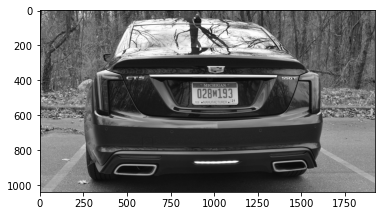

In [12]:
 #reading image in openCV using openCV imread
img = cv2.imread('image2.jpeg')
#graycolord the image imported using cvtColor, convert one color code from another, BGR to GRAY
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#displaying imge using matplotlib, it expects image in BGR so we have to change once more t
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


In [13]:
#noise reduction using bilateral filter from CV2, uses gaussian blur
biFilter = cv2.bilateralFilter(gray,11,17,17)
#getting the image with all the edges using Canny algorithm
edged = cv2.Canny(biFilter,30,200)

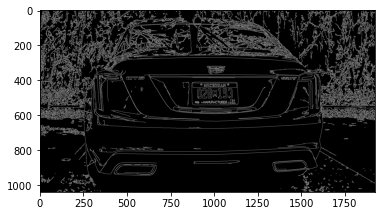

In [14]:
#displaying this noise reduced and edged image before performing contoring
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [15]:
#find the coordinates of the contours from the image that is edged 
#we are returning a tree of contours so that we can iterate over different level of contours
#Chain_Approx_Simple returns only the key points of tge contour, if rectangle then 4, if line then 2
contourPoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#grabbing contours
contours = imutils.grab_contours(contourPoints)
# returning top 10 contours in the reverse order 
contours = sorted(contours,key=cv2.contourArea,reverse = True)[:10]

In [16]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [17]:
location

array([[[ 870,  420]],

       [[ 880,  541]],

       [[1135,  533]],

       [[1124,  413]]], dtype=int32)

In [18]:
#applying masking to isolate the contour we just found (rectangle)
#blank mask, it will be same same as tge size of the grey image, we filled it with 0s
mask = np.zeros(gray.shape, np.uint8)
#display the contours over the mask 
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)



 

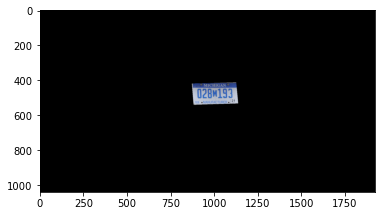

In [19]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [20]:
 #isolate the contour from the entire mask
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
croppedImage= gray[x1:x2+1,y1:y2+1]

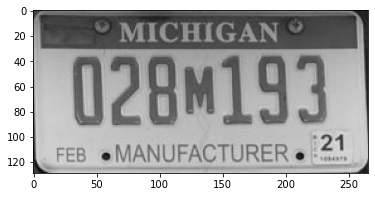

In [21]:
plt.imshow(cv2.cvtColor(croppedImage,cv2.COLOR_BGR2RGB))

In [24]:
 #using easy ocr to read text
reader = easyocr.Reader(['en'])
result = reader.readtext(croppedImage)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'028m193'

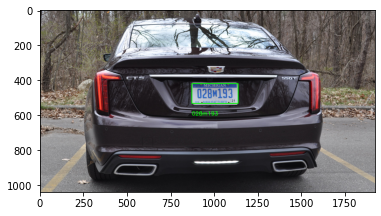

In [23]:
text = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text = text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace = font,fontScale = 1, color=(0,255,0),thickness=2,lineType = cv2.LINE_AA )
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
text